In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
data= pd.DataFrame(digits.data,digits.target)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
data.shape


(1797, 64)

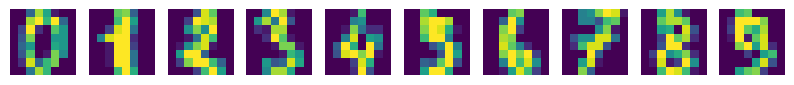

In [9]:

fig, axes = plt.subplots(1, 10, figsize=(10, 3))

# Loop through the first 3 images and plot them
for i, ax in enumerate(axes):
    ax.matshow(digits.images[i])
    ax.axis('off')

In [10]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [12]:
data['target'] = digits.target

In [13]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [47]:
from sklearn.model_selection import train_test_split



X_train,X_test,y_train,y_test = train_test_split(data.drop(['target'],axis='columns'),data.target,test_size=0.2,random_state=42)

In [48]:
X_test.shape

(360, 64)

In [60]:
from sklearn.ensemble import RandomForestClassifier






# model= RandomForestClassifier(n_estimators=40)# means 40 different decision tress use to predict to the conclusion

#give 20 random tress

model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
model.score(X_test,y_test)

0.975

In [62]:
#lest check in the conmfuision matrix
y_predicted = model.predict(X_test)



#y_predicted is predicted by the model for X_test inputs wjhile
#y_test is the truth 
# lets check the confusion matrix with this results


In [64]:
#confusion matrix allows to plot truth on 1 axis and preddiction on other axis

from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predicted)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]])

Text(50.722222222222214, 0.5, 'Truth')

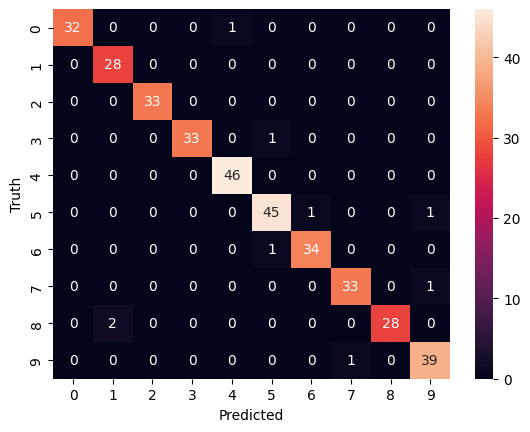

In [65]:
# lets check by seaborn 

import seaborn as sn

sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
#i had 33 times the truth was  0 and 33 times its predicted as 0

#Similarly I had 2 time truth as 8 but the model predicted 1.
# also 1 time truth as 6 but presdicted as 5 
# total 8 times the model faild to predict the actua  reult
#  

In [66]:
#wants to do same using decison tree lets check
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.score(X_test,y_test)

#just gave 83 % accuracy rate which is very poor comapred to Random Forest of 97%

0.8388888888888889

In [80]:
y_predicted = model.predict(X_test)

In [81]:
#lets check the confusion matrix here

from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_predicted)
cn

array([[29,  0,  1,  0,  2,  1,  0,  0,  0,  0],
       [ 0, 21,  1,  1,  2,  0,  1,  0,  1,  1],
       [ 0,  0, 25,  4,  1,  0,  1,  1,  1,  0],
       [ 0,  0,  0, 30,  0,  0,  1,  0,  2,  1],
       [ 0,  0,  0,  1, 41,  1,  2,  1,  0,  0],
       [ 1,  0,  0,  1,  1, 39,  1,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  1],
       [ 0,  0,  0,  2,  1,  0,  0, 31,  0,  0],
       [ 0,  2,  0,  1,  3,  1,  0,  1, 20,  2],
       [ 0,  2,  0,  3,  2,  0,  0,  1,  0, 32]])

Text(50.722222222222214, 0.5, 'Truth')

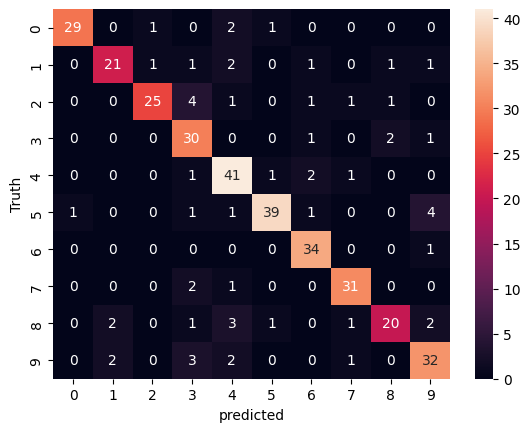

In [82]:
#show in seaborn 
import seaborn as sn
sn.heatmap(cn,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [78]:
# 31 times there can be issue i n getting th  e desired respobnse true.